In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from my_LR import my_LR
from sklearn.linear_model import LinearRegression

boston = datasets.load_boston()
target = boston.target
target = target.reshape((506,1))
data = boston.data.copy()

rand = np.random.permutation(data.shape[0])
data = data[rand]
target = target[rand]

x_train = data[0:350]
x_test = data[350:]
y_train = target[0:350]
y_test = target[350:]

In [2]:
#problem a
my=my_LR()
my.fit(x_train,y_train)
my_params=my.get_Params()
my_score=my.score(x_train,y_train)
my_predict=my.predict(x_test)
print ('score',my_score)
#plt.scatter(my_predict,y_test)
print ('params')
print (my_params)

iterations 0 cost 4317.044256136979
iterations 5000 cost 67.35081789372869
iterations 10000 cost 57.2720029947684
iterations 15000 cost 52.05374447435987
iterations 20000 cost 48.72735636752999
iterations 25000 cost 47.17373829564209
iterations 30000 cost 45.807701965250914
iterations 35000 cost 45.120400637247045
iterations 40000 cost 44.29290165620718
iterations 45000 cost 43.69932899464183
score 43.66760189142706
params
(array([[-0.10010096],
       [ 0.12420331],
       [-0.04062355],
       [ 0.22757368],
       [-0.2495665 ],
       [ 0.85455359],
       [ 0.11606446],
       [ 0.26418223],
       [ 0.02547553],
       [ 0.0052052 ],
       [ 0.20939974],
       [ 0.02734078],
       [-0.67708667]]), 0.03671925604259315)


In [3]:
#problem b
t = LinearRegression()
t.fit(x_train,y_train)
t_predict=t.predict(x_train)
my_predict=my.predict(x_train)
t_score=t.score(x_test,y_test)
print ('real price','predict price')
for i in range (y_test.shape[0]):
    print (y_test[i],"     ",my_predict[i])
    
t_weights = np.zeros(x_train.shape[1])
t_bias = 0
t_bias=t.predict(np.zeros((1,13)))
for i in range (x_train.shape[1]):
    w = np.zeros((1,13))
    w[0,i]=1.0
    t_weights[i] = t.predict(w) - t_bias
print ('LinearRegression_score:',t_score)
print ('LinearRegression_params:')
print (t_weights,t_bias)
print ('my_params:')
print (my_params[0],my_params[1])

real price predict price
[26.7]       [25.56417316]
[15.1]       [18.63665462]
[20.1]       [29.17950007]
[5.]       [21.14431298]
[50.]       [14.28247953]
[19.3]       [24.23135842]
[17.8]       [32.14882956]
[16.6]       [22.56348119]
[21.9]       [26.07122043]
[22.5]       [8.78349292]
[32.4]       [14.94346807]
[15.6]       [23.89365164]
[33.4]       [19.63054682]
[27.1]       [17.58554236]
[22.2]       [30.57074586]
[11.7]       [20.49966413]
[46.7]       [20.55252266]
[13.3]       [-0.93509919]
[17.5]       [7.35983264]
[23.]       [25.52237914]
[25.]       [1.13621018]
[16.2]       [20.20469243]
[34.9]       [21.56602514]
[33.3]       [32.87118327]
[22.4]       [29.66595159]
[13.3]       [11.74259296]
[24.4]       [21.88760993]
[24.2]       [31.82738157]
[13.6]       [17.02306049]
[22.]       [17.84722473]
[22.]       [20.31783962]
[19.9]       [24.98004592]
[16.1]       [17.78040296]
[44.8]       [28.83579546]
[25.]       [18.14213964]
[15.3]       [21.73943921]
[19.7]       [

LinearRegression cost: 0.7041568106436606
my_lr cost: 43.66760189142706
藍色為LinearRegression預測值
橘色為為my_lr預測值


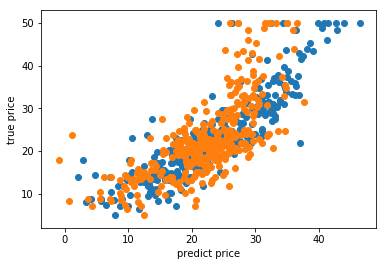

In [4]:
#problem c
print ('LinearRegression cost:',t_score)
print ('my_lr cost:',my_score)
plt.figure()

plt.scatter(t_predict,y_train)
plt.scatter(my_predict,y_train)
plt.xlabel('predict price')
plt.ylabel('true price')
print ('藍色為LinearRegression預測值')
print ('橘色為為my_lr預測值')
plt.show()

0.7038508243896903


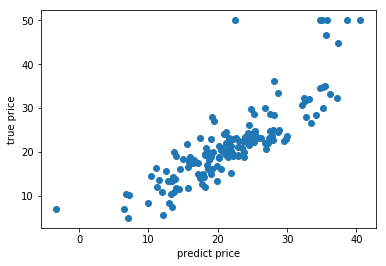

In [5]:
#problem d
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train[:,0])
ridge_predict=ridge.predict(x_test)
ridge_cost=ridge.score(x_test,y_test[:,0])
print (ridge_cost)
plt.figure()
plt.scatter(ridge_predict,y_test[:,0])
plt.xlabel('predict price')
plt.ylabel('true price')
plt.show()